In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
%matplotlib inline

# Analyzing word ranks

We want to take a look at how word rank evolves over timne. We want to try and understand how the word set evolves over time.

In [9]:
wordYear = pd.read_csv('Data/3kPluswordPerYear.csv',index_col=0)
wordYear.index = pd.to_datetime(wordYear.index)
yearIndex = wordYear.index.values

In [10]:
wordYear.head()

,-a,-la,-le,-on,-—,aarau,aarberg,aarbourg,aarg,aarhus,...,œil,œillet,œquo,œrlikon,œuf,œur-,œuvre,——,———,„„„
1798-01-01,0.0,0.0,8.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,...,10.0,0.0,0.0,0.0,0.0,0.0,4.0,2.0,0.0,0.0
1799-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,16.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0
1804-01-01,0.0,0.0,14.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,...,15.0,0.0,0.0,0.0,2.0,0.0,18.0,5.0,0.0,0.0
1805-01-01,0.0,4.0,9.0,4.0,0.0,0.0,8.0,0.0,0.0,0.0,...,6.0,0.0,0.0,0.0,0.0,0.0,16.0,0.0,0.0,4.0
1806-01-01,3.0,0.0,12.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,...,37.0,0.0,0.0,0.0,0.0,0.0,26.0,0.0,0.0,0.0


We code here a small method that ranks the most frequent words each month and returns their rank each year instead of the word count.

In [26]:
setMostFrequent = []

for i in range(10,len(yearIndex)):
    rankYear = wordYear.loc[wordYear.index[i]]\
    .sort_values(ascending=False)
    wordRank = rankYear.index.values[0:15000]
    numRank = np.arange(1,len(wordRank)+1)
    rankDF = pd.DataFrame(data=numRank,
                          index=wordRank, 
                          columns=[wordYear.index[i]])
    setMostFrequent.append(rankDF)

No we have a dataFrame that contains the evolution of their rank over times.

In [27]:
dfMostFrequent = pd.concat(setMostFrequent,axis=1)
dfMostFrequent.head()

,1812-01-01 00:00:00,1813-01-01 00:00:00,1814-01-01 00:00:00,1815-01-01 00:00:00,1816-01-01 00:00:00,1817-01-01 00:00:00,1818-01-01 00:00:00,1819-01-01 00:00:00,1820-01-01 00:00:00,1821-01-01 00:00:00,...,1989-01-01 00:00:00,1990-01-01 00:00:00,1991-01-01 00:00:00,1992-01-01 00:00:00,1993-01-01 00:00:00,1994-01-01 00:00:00,1995-01-01 00:00:00,1996-01-01 00:00:00,1997-01-01 00:00:00,1998-01-01 00:00:00
-a,5040.0,NaN,NaN,NaN,NaN,6468.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
-la,3238.0,6830.0,NaN,NaN,12502.0,NaN,12582.0,NaN,9711.0,12005.0,...,NaN,11655.0,NaN,11669.0,14200.0,14138.0,NaN,NaN,NaN,NaN
-le,1483.0,1850.0,6919.0,NaN,7191.0,NaN,12580.0,NaN,9726.0,12002.0,...,NaN,11621.0,NaN,11650.0,14199.0,14134.0,NaN,NaN,NaN,NaN
-on,2030.0,3903.0,NaN,NaN,12491.0,NaN,12579.0,NaN,9571.0,12000.0,...,NaN,11459.0,NaN,11707.0,14198.0,14133.0,NaN,NaN,NaN,NaN
-—,NaN,12330.0,NaN,NaN,12487.0,NaN,12556.0,NaN,9798.0,11975.0,...,7573.0,10710.0,NaN,11722.0,14196.0,14132.0,NaN,NaN,NaN,NaN


Let's look at the words that are always here in the most frequent set (i.e their rank never exceeds 200 so they have no NA in the dataframe).

In [28]:
wordAlways = dfMostFrequent.dropna(axis=0)
print(wordAlways.shape)
wordAlways.head()

(1719, 187)


,1812-01-01 00:00:00,1813-01-01 00:00:00,1814-01-01 00:00:00,1815-01-01 00:00:00,1816-01-01 00:00:00,1817-01-01 00:00:00,1818-01-01 00:00:00,1819-01-01 00:00:00,1820-01-01 00:00:00,1821-01-01 00:00:00,...,1989-01-01 00:00:00,1990-01-01 00:00:00,1991-01-01 00:00:00,1992-01-01 00:00:00,1993-01-01 00:00:00,1994-01-01 00:00:00,1995-01-01 00:00:00,1996-01-01 00:00:00,1997-01-01 00:00:00,1998-01-01 00:00:00
abonn,537.0,454.0,4578.0,1771.0,1452.0,1321.0,1191.0,1376.0,1462.0,1382.0,...,2821.0,3249.0,2879.0,2627.0,2506.0,2611.0,2617.0,2776.0,2173.0,1988.0
abord,969.0,954.0,744.0,721.0,555.0,604.0,528.0,530.0,587.0,856.0,...,636.0,641.0,666.0,608.0,569.0,617.0,624.0,746.0,676.0,593.0
absence,952.0,1174.0,971.0,1389.0,1226.0,1607.0,1220.0,1242.0,1445.0,707.0,...,1533.0,1463.0,1376.0,1440.0,1508.0,1592.0,1604.0,1593.0,1570.0,1475.0
absolue,3371.0,1300.0,1591.0,1449.0,2264.0,1446.0,2328.0,1590.0,1477.0,1472.0,...,3267.0,3049.0,3071.0,3432.0,3004.0,3690.0,4397.0,3952.0,4363.0,4643.0
absolument,2061.0,3143.0,1604.0,2741.0,2332.0,1250.0,1901.0,1561.0,3096.0,2178.0,...,3143.0,2859.0,2926.0,2854.0,3066.0,3047.0,3550.0,3094.0,3278.0,3395.0


We select here a few words so that we can plot them in another word visualization.

In [29]:
wordSelect = wordAlways.loc[['autre','conseil','contre','donner','droite','encore','france','suisse','lausanne','jour',
                            'nouvelle','ville','mois','être']]
wordSelect.to_csv('Data/wordSelection.csv')

We will sort these most frequent and sort them from 1 to 14 for easier viz.

In [30]:
rankList = []

for i in wordSelect.columns:
    valuesWord = wordSelect[i].sort_values(ascending=False)
    word = valuesWord.index.values
    rank = np.arange(1,15)
    df = pd.DataFrame(data=rank,
                          index=word, 
                          columns=[i])
    rankList.append(df)

rankDF = pd.concat(rankList,axis=1)
rankDF.to_csv('Data/wordSelect_Rank.csv')
rankDF.head()

,1812-01-01 00:00:00,1813-01-01 00:00:00,1814-01-01 00:00:00,1815-01-01 00:00:00,1816-01-01 00:00:00,1817-01-01 00:00:00,1818-01-01 00:00:00,1819-01-01 00:00:00,1820-01-01 00:00:00,1821-01-01 00:00:00,...,1989-01-01 00:00:00,1990-01-01 00:00:00,1991-01-01 00:00:00,1992-01-01 00:00:00,1993-01-01 00:00:00,1994-01-01 00:00:00,1995-01-01 00:00:00,1996-01-01 00:00:00,1997-01-01 00:00:00,1998-01-01 00:00:00
autre,4,3,3,5,3,5,5,3,6,5,...,8,8,7,7,6,6,6,6,6,6
conseil,1,2,7,4,7,3,3,2,3,2,...,9,9,9,8,8,8,7,8,8,7
contre,8,7,5,6,5,6,7,10,10,9,...,12,12,12,12,11,10,9,9,9,9
donner,12,12,12,13,13,13,12,12,13,14,...,3,2,3,2,2,3,2,3,3,2
droite,7,4,2,3,2,2,2,6,4,4,...,2,3,2,4,3,1,1,1,2,3


Now we can take a look at the evolution of the words set.

Here we want to look at the probabilityof finding the N th most frequent word in a given year. To do that we count how many times it belongs to the most frequent set and then divide by the total number of years in the dataset.

We see on the following graph that the first 1700 words appear always (P=1) and then it decreases very slowly. This shows that this newspaper increases a large vocabulary.

We suppose that if we compare this graph with text corpuses from 20 minutes for example the word set would be much smaller.

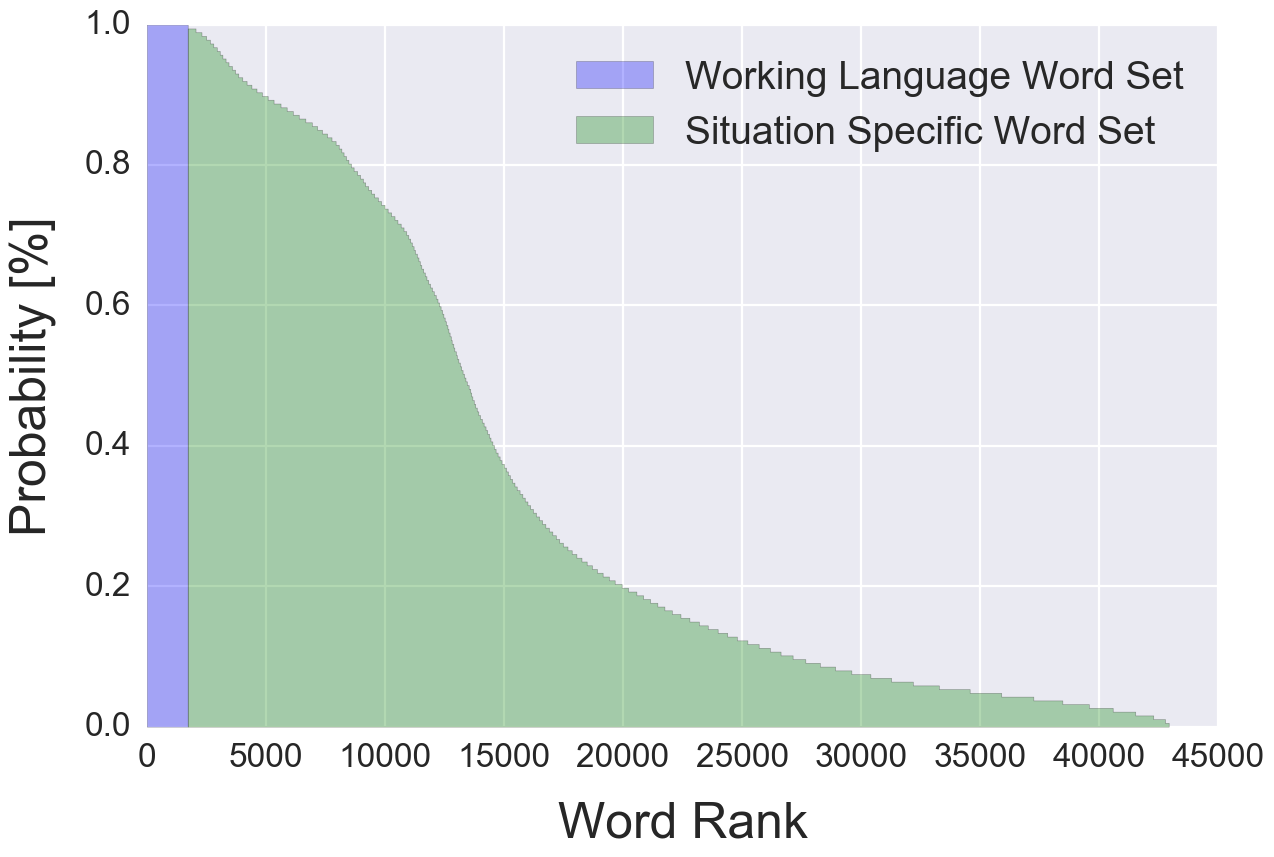

In [31]:
topWord = dfMostFrequent.fillna(0).astype(bool).sum(axis=1).astype(np.float)
restWords = topWord.sort_values(ascending=False).values[1719:45000]/187
plt.fill_between(np.arange(0,1719),np.zeros(1719),np.ones(1719),
                 facecolor='blue',alpha=0.3,label='Working Language Word Set')
plt.fill_between(np.arange(1719,len(restWords)+1719),np.zeros(len(restWords)),
                 restWords,facecolor='green',alpha=0.3,label='Situation Specific Word Set')
hfont = {'fontname':'Arial'}

ax = plt.gca()
ax.set_ylabel('Probability [%]',fontsize=36,labelpad=20,**hfont)
ax.set_xlabel('Word Rank',fontsize=36,labelpad=20,**hfont)
sns.set_context("poster")
plt.tight_layout()
plt.tick_params(axis='both', which='major', labelsize=24)
plt.legend(prop={'size':28})
plt.savefig('Plots/probWord.png')

We also want to have a small look at the evolution of the rank of certain words of interest over time.

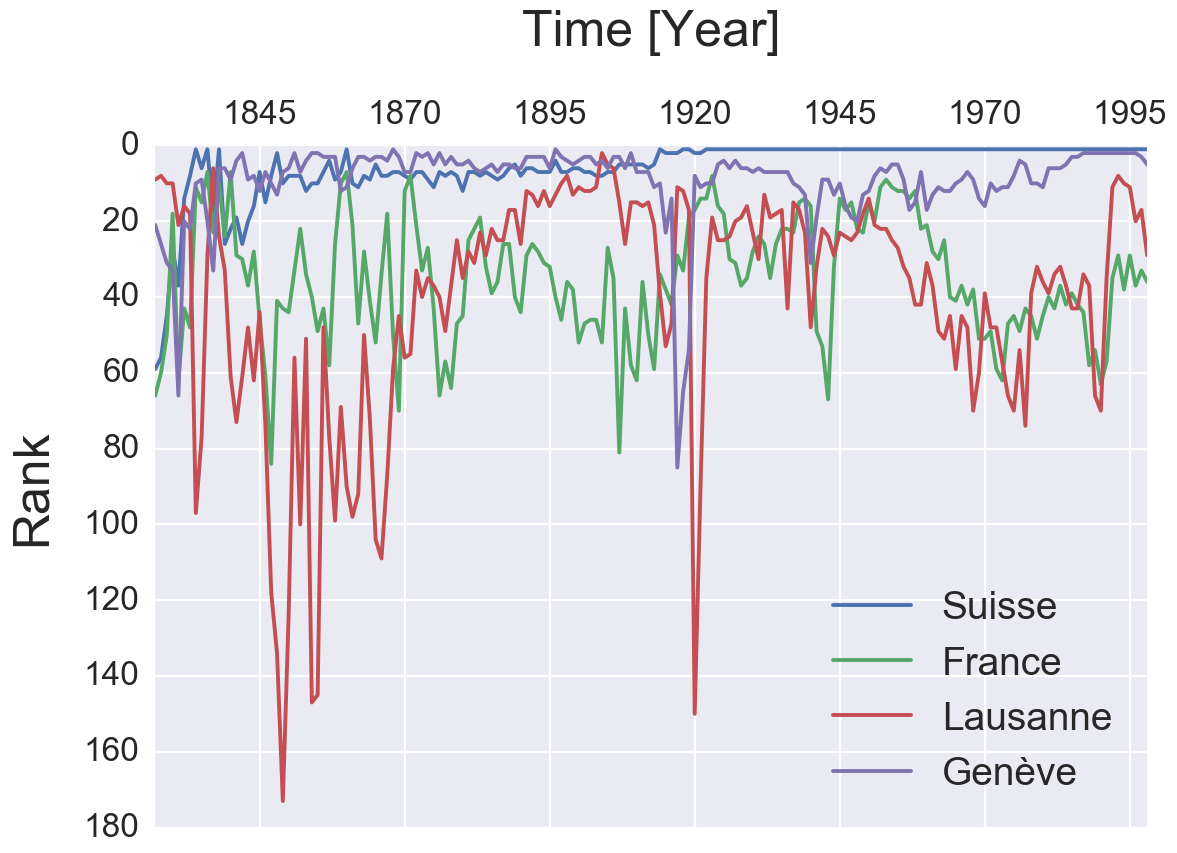

In [32]:
dfMostFrequent.loc['suisse'][15:].plot(label='Suisse')
dfMostFrequent.loc['france'][15:].plot(label='France')
dfMostFrequent.loc['lausanne'][15:].plot(label='Lausanne')
dfMostFrequent.loc['genève'][15:].plot(label='Genève')
ax = plt.gca()
ax.invert_yaxis()
ax.xaxis.tick_top()

ax = plt.gca()
ax.set_ylabel('Rank',fontsize=36,labelpad=20,**hfont)
ax.set_xlabel('Time [Year]',fontsize=36,labelpad=20,**hfont)

plt.tick_params(axis='both', which='major', labelsize=24)
ax.xaxis.set_label_coords(0.5, 1.2)
plt.legend(loc=4,prop={'size':28})
plt.savefig('Plots/rankTime.png')